In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Sonar.csv')

# Display the first few rows of the dataset
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [2]:
# Check for missing values
missing = df.isnull().sum().sum()

# Distribution of the target variable
target = df['Class'].value_counts()

missing, target


(0,
 Class
 0    111
 1     97
 Name: count, dtype: int64)

In [3]:
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest, RFE
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
import numpy as np

# Splitting data into features and target variable
X = df.drop(columns='Class')
y = df['Class']

# 1. Information Gain
info_gain_scores = mutual_info_classif(X, y)
info_gain_rank = np.argsort(info_gain_scores)[::-1]

# 2. Fisher Score (ANOVA)
f_values, _ = f_classif(X, y)
fisher_rank = np.argsort(f_values)[::-1]

# 3. Univariate ROC/AUC
roc_auc_scores = []
for column in X.columns:
    score = roc_auc_score(y, X[column])
    roc_auc_scores.append(score)
roc_auc_rank = np.argsort(roc_auc_scores)[::-1]

# 4. Univariate RMSE
rmse_scores = []
for column in X.columns:
    predictions = cross_val_predict(RandomForestClassifier(n_estimators=10), np.array(X[column]).reshape(-1, 1), y, cv=3)
    score = mean_squared_error(y, predictions)
    rmse_scores.append(score)
rmse_rank = np.argsort(rmse_scores)

# Store rankings
rankings = {
    'Info Gain': info_gain_rank,
    'Fisher Score': fisher_rank,
    'ROC/AUC': roc_auc_rank,
    'RMSE': rmse_rank
}

rankings


{'Info Gain': array([11, 10, 48, 47,  8,  9, 45, 36, 38,  7, 19, 20, 57, 14, 24, 32, 22,
        58, 16, 59, 35, 54, 15, 28, 46, 21, 42, 12, 51, 37, 29,  0, 39,  4,
        44, 23,  6, 43,  3, 31,  2,  1, 56, 52, 26,  5, 55, 53, 49, 50, 13,
        27, 41, 17, 18, 40, 25, 34, 33, 30], dtype=int64),
 'Fisher Score': array([10, 11, 48,  9, 44, 47,  8, 12, 45, 46, 50, 51, 43,  0, 35,  3, 20,
        42,  1, 34, 19,  4, 36, 21,  2,  7, 57, 53, 49, 33, 13, 41, 52, 18,
         5, 58, 55, 22,  6, 30, 32, 54, 59, 27, 23, 14, 38, 31, 26, 37, 28,
        39, 25, 24, 40, 17, 15, 29, 16, 56], dtype=int64),
 'ROC/AUC': array([35, 34, 36, 33, 30, 32, 31, 37, 29, 56, 54, 39, 59, 24, 25, 17, 40,
        16, 28, 15, 14, 26, 58, 23, 38, 55, 53, 52, 18, 27,  6, 22, 41, 57,
        21, 13,  2, 49,  1, 19,  5, 42,  7, 20, 43,  0,  4,  3, 44, 45, 51,
        46, 50, 12, 47,  8, 48,  9, 11, 10], dtype=int64),
 'RMSE': array([11, 10, 48,  8, 39, 58, 47,  4,  0, 12, 44, 57, 13, 59, 24, 38,  6,
        34, 19,

In [4]:
# 5. Wrapper Method: RFE with Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
rfe = RFE(estimator=rf, n_features_to_select=1, step=1)
rfe.fit(X, y)
wrapper_rank = np.argsort(rfe.ranking_)

# Add the wrapper rankings to our rankings dictionary
rankings['Wrapper (RFE)'] = wrapper_rank

rankings['Wrapper (RFE)']


array([10, 11, 26, 47,  9,  8, 48, 15, 51, 19, 44, 50, 36, 35, 46, 12, 20,
       16, 30,  3, 17, 27, 22, 45, 42,  4, 43,  7, 21, 14,  5, 38, 29, 23,
       53, 34,  2, 32, 18,  0, 31, 54, 37, 13, 33, 39, 25, 41, 57, 59, 49,
        6, 40, 24, 55, 28,  1, 58, 52, 56], dtype=int64)

In [5]:
# Compute average rank for each feature
average_ranks = np.zeros(X.shape[1])

for method, ranking in rankings.items():
    for rank, index in enumerate(ranking):
        average_ranks[index] += rank

# Sort indices based on average rank
final_ranking = np.argsort(average_ranks)

# Top 10 features based on average rank
top_features = X.columns[final_ranking[:10]]

top_features


Index(['V12', 'V11', 'V49', 'V36', 'V48', 'V9', 'V37', 'V10', 'V20', 'V45'], dtype='object')

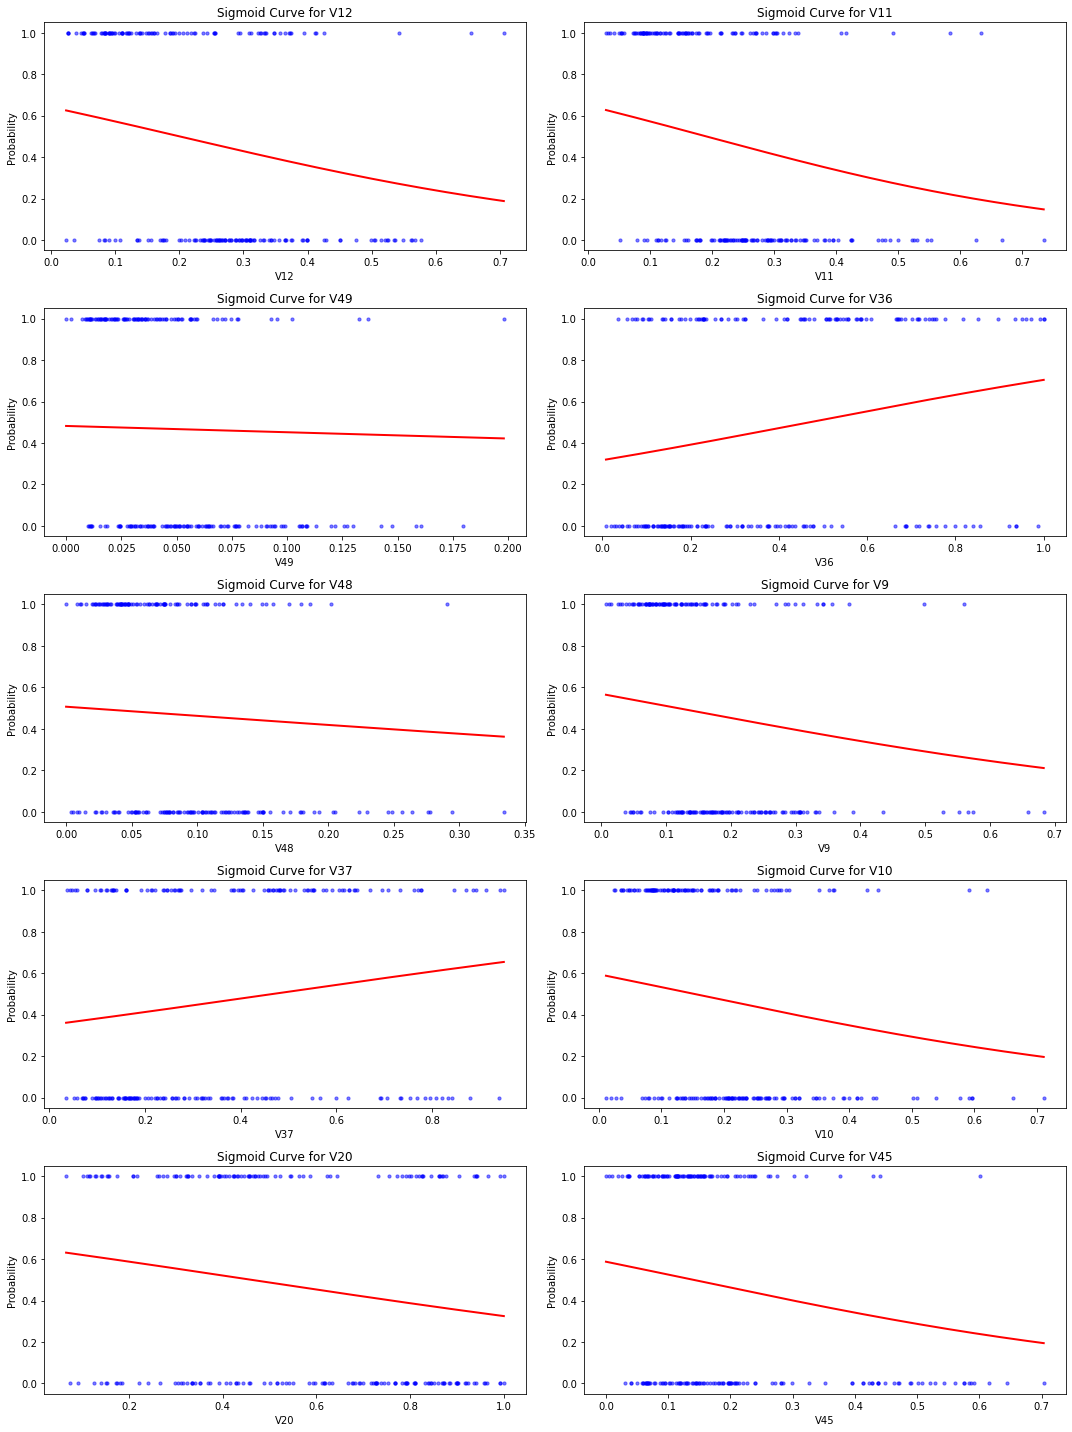

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

# Set up the figure and axes
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axs = axs.ravel()

# For each feature, fit a logistic regression model and visualize the sigmoid curve
for i, feature in enumerate(top_features):
    # Fit logistic regression
    lr = LogisticRegression()
    lr.fit(X[feature].values.reshape(-1, 1), y)
    
    # Generate data for sigmoid curve
    x_test = np.linspace(X[feature].min(), X[feature].max(), 300)
    y_test = expit(x_test * lr.coef_ + lr.intercept_).ravel()
    
    # Plot
    axs[i].plot(x_test, y_test, color='red', linewidth=2)
    axs[i].scatter(X[feature], y, color='blue', s=10, alpha=0.5)
    axs[i].set_title(f"Sigmoid Curve for {feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Probability")

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# #     Each plot shows the relationship between the selected feature and the target variable.
# #     The blue points represent the actual data points, while the red curve represents the sigmoid function fitted using logistic regression.

# # These visualizations help in understanding how each feature affects the probability of the target class.
# The steeper the sigmoid curve, the stronger the relationship between the feature and the target variable.

In [ ]:
# logisitc 

In [7]:
from sklearn.model_selection import train_test_split

# Select top features
X_selected = X[top_features]

# Split the dataset into training and testing subsets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((166, 10), (42, 10))

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import time

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)

# Set up the GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Measure the time taken for training and hyperparameter tuning
start_time = time.time()

# Train the model
grid_search.fit(X_train, y_train)

# Record the time taken
training_time = time.time() - start_time

# Extract the best parameters and best model from grid search
best_params = grid_search.best_params_
best_log_reg = grid_search.best_estimator_

best_params, training_time


({'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}, 4.255397796630859)

In [ ]:
# ({'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [9]:
# Predict on the test data
y_pred = best_log_reg.predict(X_test)
y_pred_prob = best_log_reg.predict_proba(X_test)[:, 1]

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

performance_metrics = {
    'Accuracy': accuracy,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

performance_metrics


{'Accuracy': 0.8095238095238095,
 'F1 Score': 0.7777777777777777,
 'ROC AUC': 0.9302884615384615}

In [10]:
from sklearn.svm import SVC

# Define the hyperparameters and their possible values for SVM
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm = SVC(probability=True)

# Set up the GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Measure the time taken for training and hyperparameter tuning
start_time_svm = time.time()

# Train the SVM model
grid_search_svm.fit(X_train, y_train)

# Record the time taken
training_time_svm = time.time() - start_time_svm

# Extract the best parameters and best model from grid search for SVM
best_params_svm = grid_search_svm.best_params_
best_svm = grid_search_svm.best_estimator_

best_params_svm, training_time_svm


({'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, 0.3476734161376953)

In [11]:
# Predict on the test data using SVM
y_pred_svm = best_svm.predict(X_test)
y_pred_prob_svm = best_svm.predict_proba(X_test)[:, 1]

# Compute performance metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

performance_metrics_svm = {
    'Accuracy': accuracy_svm,
    'F1 Score': f1_svm,
    'ROC AUC': roc_auc_svm
}

performance_metrics_svm


{'Accuracy': 0.8095238095238095,
 'F1 Score': 0.7777777777777777,
 'ROC AUC': 0.923076923076923}

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters and their possible values for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Set up the GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Measure the time taken for training and hyperparameter tuning
start_time_dt = time.time()

# Train the Decision Tree model
grid_search_dt.fit(X_train, y_train)

# Record the time taken
training_time_dt = time.time() - start_time_dt

# Extract the best parameters and best model from grid search for Decision Tree
best_params_dt = grid_search_dt.best_params_
best_dt = grid_search_dt.best_estimator_

best_params_dt, training_time_dt


({'criterion': 'gini',
  'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'splitter': 'random'},
 0.7564787864685059)

In [13]:
# Predict on the test data using Decision Tree
y_pred_dt = best_dt.predict(X_test)
y_pred_prob_dt = best_dt.predict_proba(X_test)[:, 1]

# Compute performance metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

performance_metrics_dt = {
    'Accuracy': accuracy_dt,
    'F1 Score': f1_dt,
    'ROC AUC': roc_auc_dt
}

performance_metrics_dt


{'Accuracy': 0.7380952380952381,
 'F1 Score': 0.717948717948718,
 'ROC AUC': 0.7451923076923077}

In [14]:
# Create a DataFrame to summarize performance metrics for each model
models = ['Logistic Regression', 'SVM', 'Decision Tree']
accuracies = [accuracy, accuracy_svm, accuracy_dt]
f1_scores = [f1, f1_svm, f1_dt]
roc_aucs = [roc_auc, roc_auc_svm, roc_auc_dt]

performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'F1 Score': f1_scores,
    'ROC AUC': roc_aucs
})

performance_df


,Model,Accuracy,F1 Score,ROC AUC
0,Logistic Regression,0.809524,0.777778,0.930288
1,SVM,0.809524,0.777778,0.923077
2,Decision Tree,0.738095,0.717949,0.745192


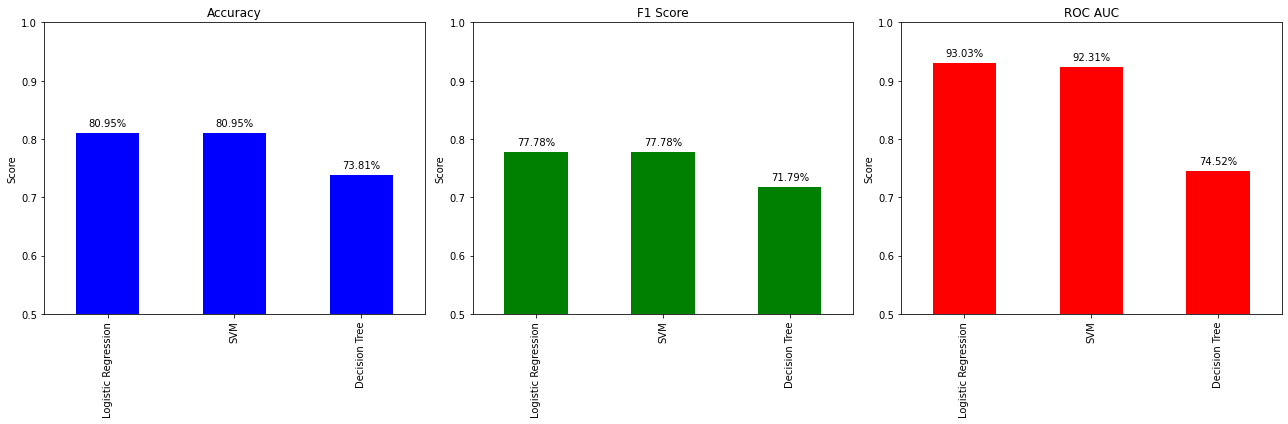

In [15]:
# Plotting the performance metrics for each model
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar plots for Accuracy, F1 Score, and ROC AUC
metrics = ['Accuracy', 'F1 Score', 'ROC AUC']
colors = ['blue', 'green', 'red']

for ax, metric, color in zip(axes, metrics, colors):
    performance_df.plot(x='Model', y=metric, kind='bar', ax=ax, color=color, legend=False)
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_xlabel('')
    ax.set_ylim(0.5, 1.0)
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
# 